Predicting Hurricane Types Using Logistic Regression

In [ ]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [ ]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [ ]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving atlantic.csv to atlantic.csv
Saving pacific.csv to pacific.csv


In [ ]:
atlantic_data = pd.read_csv('atlantic.csv')
pacific_data = pd.read_csv('pacific.csv')

 visualizing the probability of a hurricane belonging to a specific status

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


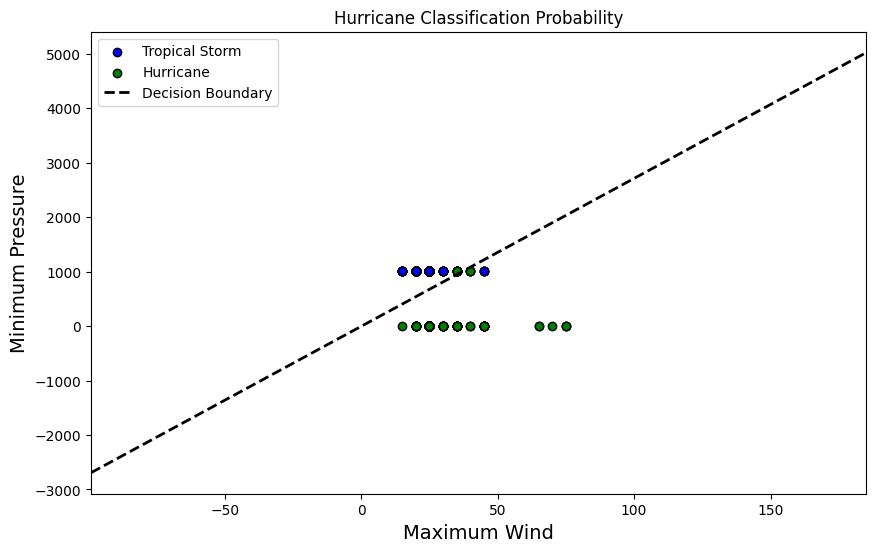

In [ ]:
from sklearn.preprocessing import LabelEncoder
atlantic_data['Label'] = 'Atlantic'
pacific_data['Label'] = 'Pacific'

combined_data = pd.concat([atlantic_data, pacific_data])

# Features: 'Maximum Wind' and 'Minimum Pressure'
A = combined_data[['Maximum Wind', 'Minimum Pressure']].values

# Encode the target variable - status
label_encoder = LabelEncoder()
B = label_encoder.fit_transform(combined_data['Status'])  # Encodes as 0, 1, etc.

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(A, B)

# Generate a grid of values for 'Maximum Wind' and 'Minimum Pressure'
a0, a1 = np.meshgrid(
    np.linspace(A[:, 0].min(), A[:, 0].max(), 500),
    np.linspace(A[:, 1].min(), A[:, 1].max(), 200),
)

# Generates predictions for the grid
A_new = np.c_[a0.ravel(), a1.ravel()]
B_proba = log_reg.predict_proba(A_new)

# Plot data points and decision boundary
plt.figure(figsize=(10, 6))

# Plot the actual points
plt.scatter(A[B == 0, 0], A[B == 0, 1], c="blue", label="Tropical Storm", edgecolors="k")
plt.scatter(A[B == 1, 0], A[B == 1, 1], c="green", label="Hurricane", edgecolors="k")

# Plot the probabilities as a contour
zz = B_proba[:, 1].reshape(a0.shape)
contour = plt.contour(a0, a1, zz, levels=[0.5], cmap=plt.cm.brg)  # Decision boundary at 0.5
plt.clabel(contour, inline=True, fontsize=12)

# Plot decision boundary
left_right = np.array([A[:, 0].min(), A[:, 0].max()])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=2, label="Decision Boundary")

# Labels, title, legend
plt.xlabel("Maximum Wind", fontsize=14)
plt.ylabel("Minimum Pressure", fontsize=14)
plt.title("Hurricane Classification Probability")
plt.legend()
plt.show()



In [ ]:
atlantic_data['Label'] = 'Atlantic'
pacific_data['Label'] = 'Pacific'

combined_data = pd.concat([atlantic_data, pacific_data])

# Select features and target for hurricane type prediction
X = combined_data[['Maximum Wind', 'Minimum Pressure']].values
y = combined_data['Status'].str.strip().map({
    'EX': 0,    # No Storm
    'HU': 1,    # Hurricane
    'TS': 2,    # Tropical Storm
    'TD': 3,    # Tropical Depression
    'WV': 4,    # Tropical Wave
    'LO': 5,    # Low Pressure
    'SS': 6,    # Subtropical Storm
    'DB': 7,    # Disturbance
    'SD': 8,    # Subtropical Depression
    'ET': 9,    # Extratropical Transition
    'PT': 10,   # Post Tropical
    'ST': 11    # Storm
})


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using Logistic Regression as a classifier
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)






/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Predicting and Evaluating the model

In [ ]:
# References: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html
atlantic_data['Label'] = 'Atlantic'
pacific_data['Label'] = 'Pacific'

# Combine both datasets
combined_data = pd.concat([atlantic_data, pacific_data])

# Features: Maximum Wind and Minimum Pressure
X = combined_data[['Maximum Wind', 'Minimum Pressure']].values

# Labels: 'Atlantic' vs 'Pacific' : 0--> Atlantic 1--> Pacific
Y = (combined_data['Label'] == 'Pacific').astype(int)
# Split data into training and testing sets (70-30 split)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#  Logistic Regression:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, Y_train)
log_Pred = log_reg.predict(X_test)
print("BY_Pred \n", classification_report(Y_test, log_Pred))


BY_Pred 
               precision    recall  f1-score   support

           0       0.65      1.00      0.79     14677
           1       0.00      0.00      0.00      7896

    accuracy                           0.65     22573
   macro avg       0.33      0.50      0.39     22573
weighted avg       0.42      0.65      0.51     22573



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Prediction using Example Values

In [ ]:
example = [[1000, 100]]  # Using Example Value
predicted_type = classifier.predict(example)
print(f"Predicted Hurricane Type : {predicted_type}")

Predicted Hurricane Type : [1]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


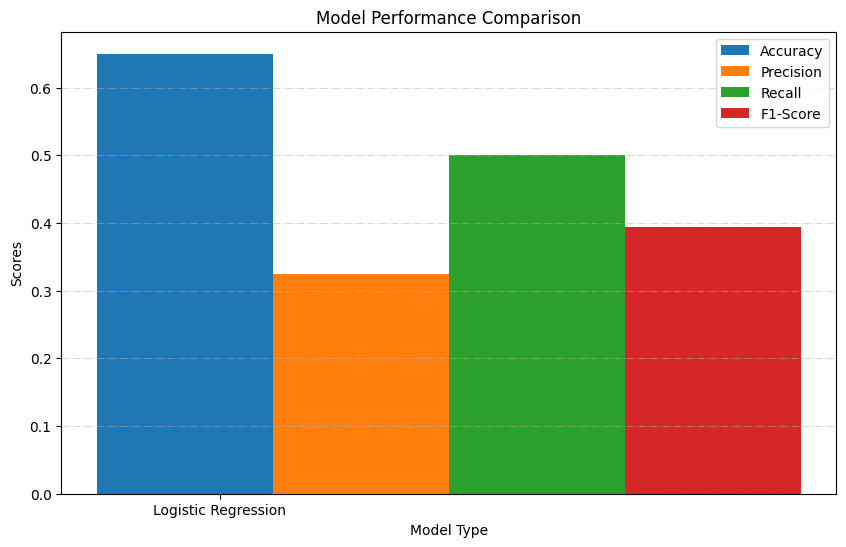

In [ ]:
log_report = classification_report(Y_test, log_Pred, output_dict=True)

model_type = ['Logistic Regression']

# Extract performance metrics
classification_report_data = {
    'Accuracy': [log_report['accuracy']],
    'Precision': [log_report['macro avg']['precision']],
    'Recall': [log_report['macro avg']['recall']],
    'F1-Score': [log_report['macro avg']['f1-score']]
}

# Plotting the performance comparison
plt.figure(figsize=(10, 6))
width_of_graph = 0.2
length_of_graph = len(model_type)
x_axis = np.arange(length_of_graph)

plt.bar(x_axis, classification_report_data['Accuracy'], width=width_of_graph, label='Accuracy')
plt.bar(x_axis + width_of_graph, classification_report_data['Precision'], width=width_of_graph, label='Precision')
plt.bar(x_axis + width_of_graph * 2, classification_report_data['Recall'], width=width_of_graph, label='Recall')
plt.bar(x_axis + width_of_graph * 3, classification_report_data['F1-Score'], width=width_of_graph, label='F1-Score')

# Adding x-axis labels and titles
plt.xticks(x_axis + width_of_graph * 0.2, model_type)
plt.xlabel('Model Type')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True, axis='y', linestyle='-.', alpha=0.5)
plt.show()
